In [2]:
import six, numpy as np
import pandas as pd

import radiomics
from radiomics import featureextractor  # This module is used for interaction with pyradiomics

import matplotlib.pyplot as plt
import seaborn as sb

## Setting Up Data

In [3]:
scanPath = '../../data/Head-Neck/CHUM-001/CT/image.nii.gz'
maskPath = '../../data/Head-Neck/CHUM-001/CT/mask_GTV.nii.gz'

paramPath = '../../data/Params/Params.yaml'
print('Parameter file, absolute path:', paramPath)

Parameter file, absolute path: ../../data/Params/Params.yaml


## Extract Features

In [4]:
# Instantiate the extractor
extractor = featureextractor.RadiomicsFeatureExtractor(paramPath)

print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)
print('Enabled features:\n\t', extractor.enabledFeatures)

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 255, 'additionalInfo': True, 'binWidth': 25, 'weightingNorm': None}
Enabled filters:
	 {'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3.0, 4.0, 5.0]}, 'Wavelet': {}}
Enabled features:
	 {'shape': None, 'firstorder': [], 'glcm': ['Autocorrelation', 'JointAverage', 'ClusterProminence', 'ClusterShade', 'ClusterTendency', 'Contrast', 'Correlation', 'DifferenceAverage', 'DifferenceEntropy', 'DifferenceVariance', 'JointEnergy', 'JointEntropy', 'Imc1', 'Imc2', 'Idm', 'Idmn', 'Id', 'Idn', 'InverseVariance', 'MaximumProbability', 'SumEntropy', 'SumSquares'], 'glrlm': None, 'glszm': None, 'gldm': None, 'ngtdm': None}


Now that we have our extractor set up with the correct parameters, we can start extracting features:

In [5]:
result = extractor.execute(scanPath, maskPath)

In [6]:

print('Result type:', type(result))  # result is returned in a Python ordered dictionary)
print('')
print('Calculated features')
for key, value in six.iteritems(result):
    print('\t', key, ':', value)
   

Result type: <class 'collections.OrderedDict'>

Calculated features
	 diagnostics_Versions_PyRadiomics : 2.2.0
	 diagnostics_Versions_Numpy : 1.18.4
	 diagnostics_Versions_SimpleITK : 1.2.4
	 diagnostics_Versions_PyWavelet : 1.1.1
	 diagnostics_Versions_Python : 3.7.7
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 255, 'additionalInfo': True, 'binWidth': 25, 'weightingNorm': None}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3.0, 4.0, 5.0]}, 'Wavelet': {}}
	 diagnostics_Image-original_Hash : 4b21314f9dbbcb96d8e6a1e1f1c09603a46df9ef
	 diagnostics_Image-original_Dimensionality : 3D
	 diagnostics_Image-original_Spacing : (0.9765620231628418, 0.9765

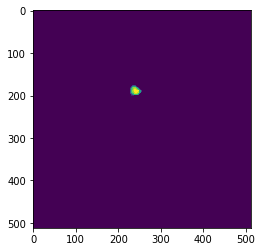

In [70]:
import SimpleITK as sitk
from PIL import Image
import numpy as np
  
image = sitk.ReadImage(maskPath)
img_array = sitk.GetArrayFromImage(image)

# we take a mask by just keeping the part of the image greater than 0
plt.imshow(np.sum((img_array>0).astype(float), 0))

In [96]:
import k3d
import math
import numpy as np
import nibabel as nib
from k3d.helpers import download

In [99]:
import vtk
from vtk.util import numpy_support

filename = '../../data/Head-Neck/CHUM-008/CT/mask_GTV.nii.gz'


nii_source = nib.load(filename)
img = nii_source.get_fdata()
dx, dy, dz = nii_source.header.get_zooms()
img = np.swapaxes(img,0,2).astype(np.float32)
nz, ny, nx = img.shape

volume = k3d.volume(img, color_range=[50,1000], color_map=np.array(k3d.basic_color_maps.Jet, dtype=np.float32))

plot = k3d.plot()
plot += volume
plot.display()

Output()